In [1]:
# EthioMart/notebooks/data_preprocessing_eda.ipynb

### --- Section 1: Setup and Configuration ---

In [2]:
# 1.1 Import necessary libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from collections import Counter
import itertools

In [3]:
# Add the project root to the system path to allow importing from config
project_root = Path.cwd().parent # This assumes you run the notebook from EthioMart/notebooks/
sys.path.append(str(project_root))
print(f"Project root added to sys.path: {project_root}")

# import cinfigurations variables
try:
    from config.config import DATA_DIR
    print("✅ Successfully imported DATA_DIR from config.config.")
except ImportError:
    print("❌ Failed to import DATA_DIR from config.config. Please check the config file.")
    DATA_DIR = Path("../data/raw") # Fallback to raw data dir

# Define the path to your cleaned data CSV file
# This should point to EthioMart/data/processed/clean_telegram_data.csv
CLEANED_CSV_PATH = DATA_DIR.parent / "processed" / "clean_telegram_data.csv"
print(f"Cleaned CSV path: {CLEANED_CSV_PATH}")

Project root added to sys.path: d:\@kaim\EthioMart
✅ Successfully imported DATA_DIR from config.config.
Cleaned CSV path: d:\@kaim\EthioMart\data\processed\clean_telegram_data.csv


#### --- Section 2: Load and Inspect Cleaned Data ---


In [4]:
print(f"\n--- Section 2: Load and Inspect Cleaned Data ---")
print(f"Attempting to load cleaned data from: {CLEANED_CSV_PATH}")

# check if the cleaned csv file exists 
if not CLEANED_CSV_PATH.exists():
    print(f"❌ Cleaned CSV file does not exist at: {CLEANED_CSV_PATH}")
    print("let's run the preprocessor.py script to generate it.")
    # %run ../src/preprocessor.py
else:
    try:
        df_clean = pd.read_csv(CLEANED_CSV_PATH, encoding='utf-8')
        print(f"✅ Successfully loaded cleaned data with {len(df_clean)} rows.")
    except Exception as e:
        print(f"❌ Failed to load cleaned data: {e}")
        df_clean = pd.DataFrame(columns=['channel_title', 'message_id', 'date', 'preprocessed_text', 'views', 'reactions_count'])
    


--- Section 2: Load and Inspect Cleaned Data ---
Attempting to load cleaned data from: d:\@kaim\EthioMart\data\processed\clean_telegram_data.csv
✅ Successfully loaded cleaned data with 5000 rows.


In [5]:
# 2.1 Display the first few rows of the cleaned data
print("--- Display Cleaned Data Dataframe info---")
df_clean.info()

--- Display Cleaned Data Dataframe info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   channel_title      5000 non-null   object
 1   message_id         5000 non-null   int64 
 2   date               5000 non-null   object
 3   preprocessed_text  2697 non-null   object
 4   views              5000 non-null   int64 
 5   reactions_count    5000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


In [6]:
# 2.2 Display the first few rows of the cleaned data
print("--- First 5 Rows of Cleaned Data ---")
print(df_clean.head())

--- First 5 Rows of Cleaned Data ---
    channel_title  message_id        date  \
0  Zemen Express®        7004  2025-06-23   
1  Zemen Express®        7003  2025-06-23   
2  Zemen Express®        7002  2025-06-23   
3  Zemen Express®        7001  2025-06-23   
4  Zemen Express®        7000  2025-06-23   

                                   preprocessed_text  views  reactions_count  
0  Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነ...   1362                0  
1                                                NaN   1171                0  
2                                                NaN   1167                0  
3                                                NaN   1161                0  
4  Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነ...   1129                1  


In [7]:
print("--- DataFrame Columns ---")
print(df_clean.columns)

--- DataFrame Columns ---
Index(['channel_title', 'message_id', 'date', 'preprocessed_text', 'views',
       'reactions_count'],
      dtype='object')


In [8]:
print("--- Diplay the messages in the 'preprocessed_text' column for a message id ---")
print(df_clean[['message_id', 'preprocessed_text']].head(10) )

--- Diplay the messages in the 'preprocessed_text' column for a message id ---
   message_id                                  preprocessed_text
0        7004  Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነ...
1        7003                                                NaN
2        7002                                                NaN
3        7001                                                NaN
4        7000  Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነ...
5        6999  Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነ...
6        6998                                                NaN
7        6997                                                NaN
8        6996                                                NaN
9        6995  Food mould Tool ስድስት አይነት ቅርጽ ዋጋ፦ 700 ETB ውስን ...


In [9]:
# 2.3 Check for missing values
print("\n--- Missing Values Count ---")
print(df_clean.isnull().sum())


--- Missing Values Count ---
channel_title           0
message_id              0
date                    0
preprocessed_text    2303
views                   0
reactions_count         0
dtype: int64


In [10]:

# 2.4 Check for duplicate rows
print("\n--- Duplicate Rows Count ---")
print(df_clean.duplicated().sum())


--- Duplicate Rows Count ---
0


In [11]:
# 2.5 Display basic statistics of the numerical columns
print("\n--- Basic Statistics of Numerical Columns (views, reactions_count) ---")
print(df_clean[['views', 'reactions_count']].describe())


--- Basic Statistics of Numerical Columns (views, reactions_count) ---
               views  reactions_count
count    5000.000000      5000.000000
mean    18402.353600        12.601800
std     14430.036714        19.074129
min         0.000000         0.000000
25%      6669.000000         0.000000
50%     12644.000000         0.000000
75%     24821.000000        27.000000
max    118548.000000        90.000000


In [12]:
# 2.6 Display the unique values in the 'channel_title' column
print("\n--- Unique Channel Titles ---")
print(df_clean['channel_title'].unique())


--- Unique Channel Titles ---
['Zemen Express®' 'EthioBrand®' 'ልዩ እቃ' 'Fashion tera' 'ማራኪ ცЯﾑŋの™']


#### --- Section 3: Exploratory Data Analysis (EDA) on Cleaned Data ---


In [13]:
# 3.1 Check for empty preprocessed messages if nan, replace with empty string
# df_clean['preprocessed_text_length'] = df_clean['preprocessed_text'].astype(str).apply(len)
print("\n--- Check for Empty Preprocessed Messages ---")
# df_clean['preprocessed_text_length'] = df_clean['preprocessed_text'].apply(lambda x: len(str(x).strip()) if pd.notnull(x) else 0)
df_clean['preprocessed_text_length'] = df_clean['preprocessed_text'].apply(lambda x: len(str(x).strip()) if pd.notna(x) else 0)


--- Check for Empty Preprocessed Messages ---


In [14]:
print("--- DataFrame Columns to verify the preprocessed_text_length is added ---")
print(df_clean.columns)

--- DataFrame Columns to verify the preprocessed_text_length is added ---
Index(['channel_title', 'message_id', 'date', 'preprocessed_text', 'views',
       'reactions_count', 'preprocessed_text_length'],
      dtype='object')


In [15]:
# display the number of each length of preprocessed_text
print("\n--- Count of Preprocessed Text Lengths ---")
print(df_clean['preprocessed_text_length'].value_counts())


--- Count of Preprocessed Text Lengths ---
preprocessed_text_length
0      2303
147      60
150      48
149      44
129      42
       ... 
659       1
533       1
639       1
232       1
220       1
Name: count, Length: 391, dtype: int64


In [16]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
# to save plots  in D:\@kaim\EthioMart\outputs\plots dir
OUTPUT_PLOTS_DIR = Path("D:/@kaim/EthioMart/outputs/plots")
if not OUTPUT_PLOTS_DIR.exists():
    print(f"Creating output plots directory at: {OUTPUT_PLOTS_DIR}")
    OUTPUT_PLOTS_DIR.mkdir(parents=True, exist_ok=True)
else:
    print(f"Output plots directory already exists at: {OUTPUT_PLOTS_DIR}")

Output plots directory already exists at: D:\@kaim\EthioMart\outputs\plots



Preprocessed Message Text Length Statistics:
count    5000.000000
mean      121.281800
std       143.551279
min         0.000000
25%         0.000000
50%       125.000000
75%       173.000000
max       733.000000
Name: preprocessed_text_length, dtype: float64


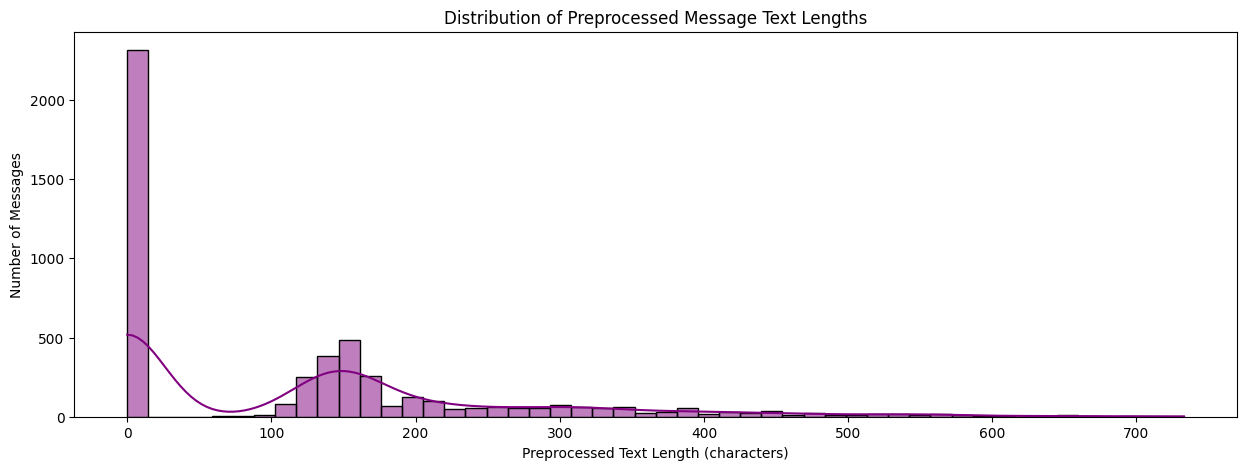

In [18]:
# 3.2 Distribution of preprocessed message length (character count)
print("\nPreprocessed Message Text Length Statistics:")
print(df_clean['preprocessed_text_length'].describe())

plt.figure(figsize=(15, 5))
sns.histplot(df_clean['preprocessed_text_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Preprocessed Message Text Lengths')
plt.xlabel('Preprocessed Text Length (characters)')
plt.ylabel('Number of Messages')
# save the plot
plt.savefig(OUTPUT_PLOTS_DIR / "preprocessed_text_length_distribution.png")
plt.show()


--- Basic Statistics of Views ---
count      5000.000000
mean      18402.353600
std       14430.036714
min           0.000000
25%        6669.000000
50%       12644.000000
75%       24821.000000
max      118548.000000
Name: views, dtype: float64

--- Distribution of Views ---


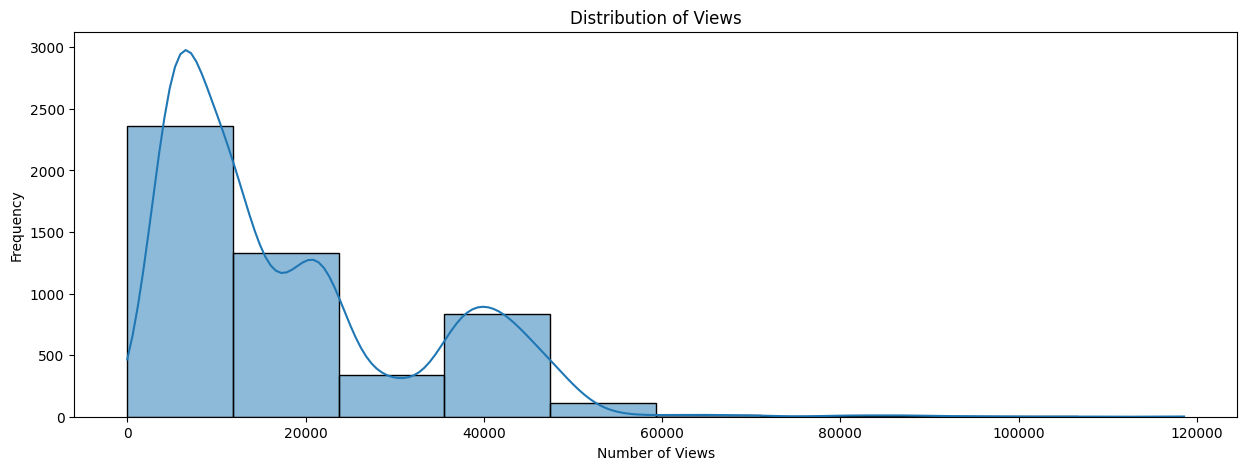

In [19]:
# 3.3 Display the distribution of the 'views' column
print("\n--- Basic Statistics of Views ---")
print(df_clean['views'].describe())
print("\n--- Distribution of Views ---")
plt.figure(figsize=(15, 5))
sns.histplot(df_clean['views'], bins=10, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.savefig(OUTPUT_PLOTS_DIR / "views_distribution.png")
plt.show()


--- Basic Statistics of Reactions Count ---
count    5000.000000
mean       12.601800
std        19.074129
min         0.000000
25%         0.000000
50%         0.000000
75%        27.000000
max        90.000000
Name: reactions_count, dtype: float64

--- Distribution of Reactions Count ---


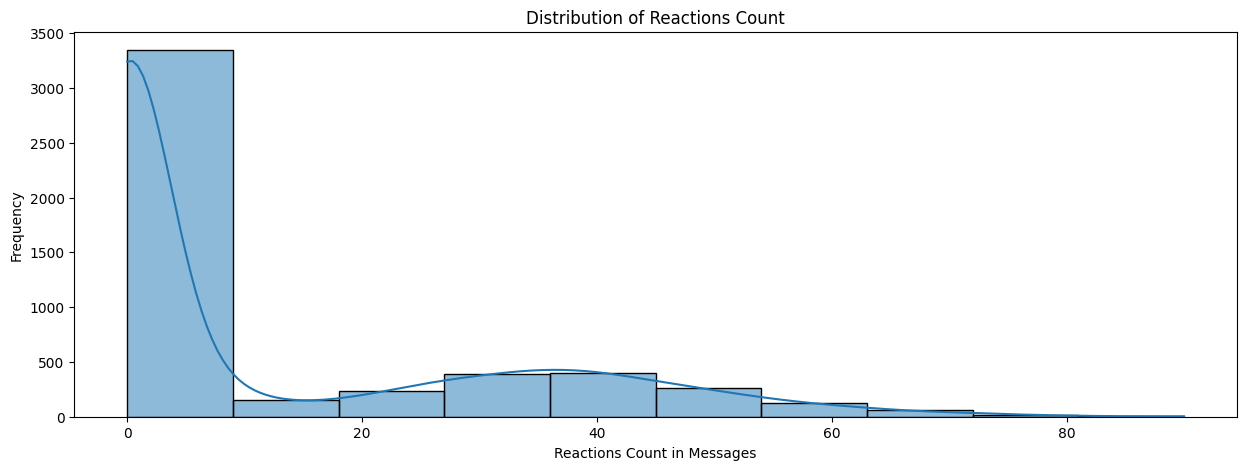

In [20]:
# 3.4 Display the distribution of the 'reactions_count' column
print("\n--- Basic Statistics of Reactions Count ---")
print(df_clean['reactions_count'].describe())

print("\n--- Distribution of Reactions Count ---")
plt.figure(figsize = (15, 5))
sns.histplot(df_clean['reactions_count'], bins=10, kde=True)
plt.title('Distribution of Reactions Count')
plt.xlabel('Reactions Count in Messages')
plt.ylabel('Frequency')
plt.savefig(OUTPUT_PLOTS_DIR / "reactions_count_distribution.png")
plt.show()  

In [21]:
# 3.3 Top N most frequent words in preprocessed text (basic tokenization for visualization)
all_words = list(itertools.chain.from_iterable(df_clean['preprocessed_text'].astype(str).apply(lambda x: x.split()).tolist()))
word_counts = Counter(all_words)

print("\nTop 20 Most Frequent Words in Preprocessed Text:")
top_words = word_counts.most_common(20)
for word, count in top_words:
    print(f"- {word}: {count}")


Top 20 Most Frequent Words in Preprocessed Text:
- nan: 2303
- ETB: 1906
- ቁጥር: 1798
- Price: 1279
- Size: 1083
- or: 1020
- ደረጃ: 1014
- ጀርባ: 1001
- እንደወጡ: 1000
- አድራሻሜክሲኮ: 999
- ኮሜርስ: 999
- መዚድ: 999
- ፕላዛ: 999
- ያገኙናል: 999
- call: 999
- ቢሮ: 853
- 101: 848
- የመጀመሪያ: 844
- የቢሮ: 844
- ፎቅ: 763


- Add the amharic characters supporting font. Since windows 11 has a default amharic font, I am using it in my case Nyala.ttf font.

In [ ]:
# You can get this path by going to C:\Windows\Fonts\, finding Nyala, right-clicking -> Properties
amharic_font_path = r"C:\Windows\Fonts\Nyala.ttf" # Use a raw string (r"...") to avoid issues with backslashes

In [23]:
# allow to disply amharic characters in the plot by using abbisia font
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

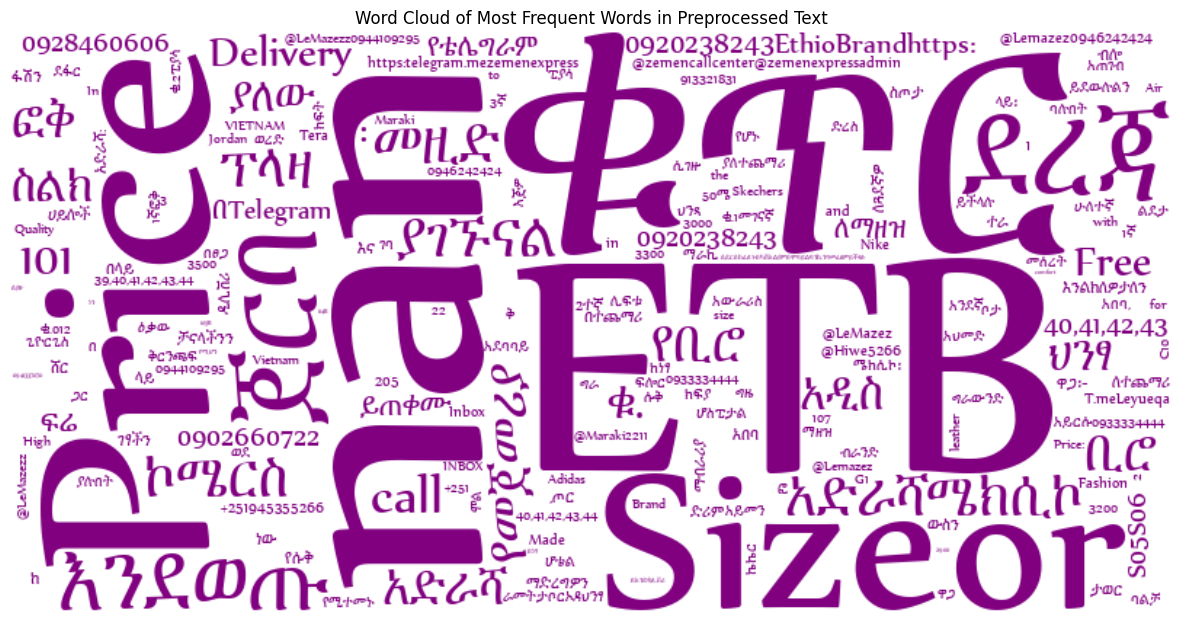

In [24]:
# how to add amharic characters support in wordcloud
from wordcloud import WordCloud
# Generate a word cloud from the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda *args, **kwargs: "purple", font_path=amharic_font_path).generate_from_frequencies(dict(word_counts))  

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Preprocessed Text')
plt.savefig(OUTPUT_PLOTS_DIR / "word_cloud_most_frequent_words.png")
plt.show()

In [25]:
import matplotlib.font_manager as fm

fm.fontManager.addfont(amharic_font_path)

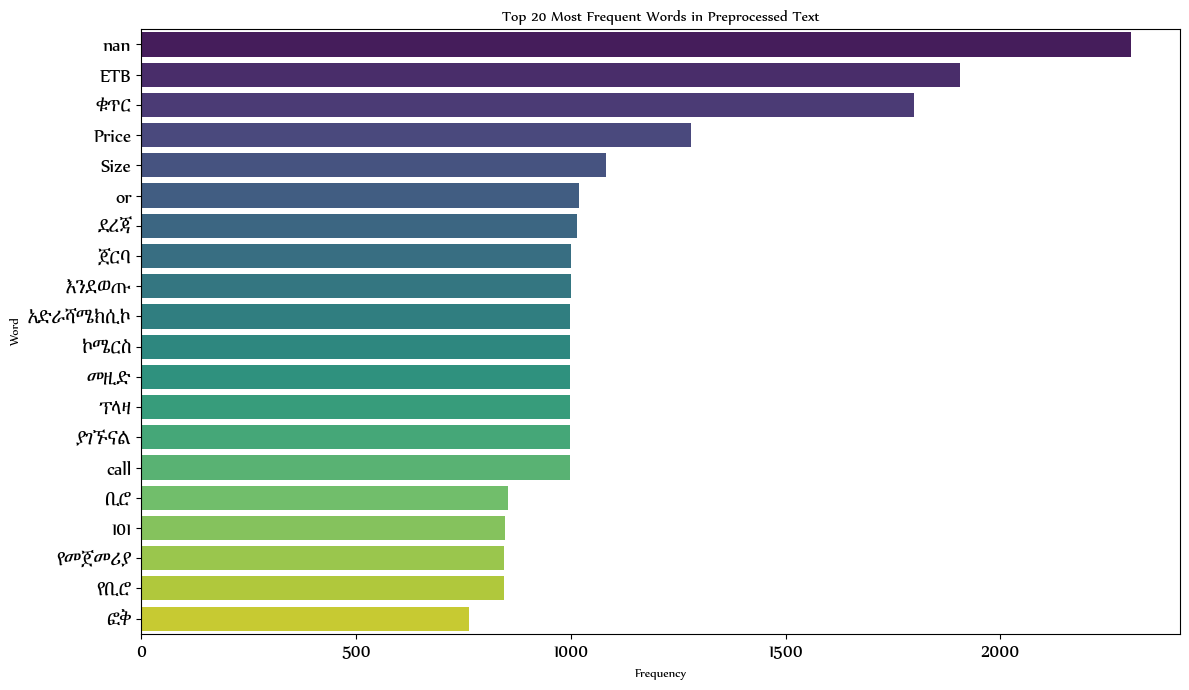

In [30]:
# Set Matplotlib's default font to Nyala for all text elements
plt.rcParams['font.family'] = 'Nyala'
plt.rcParams['font.sans-serif'] = ['Nyala'] # Include in sans-serif list for broader application

# Visualize top words
words, counts = zip(*top_words)
plt.figure(figsize=(12, 7))
sns.barplot(x=list(counts), y=list(words), palette='viridis')

# The font will now apply to these labels/title if they contain Amharic characters,
# and definitely to the 'words' on the y-axis.
plt.title('Top 20 Most Frequent Words in Preprocessed Text')
plt.xlabel('Frequency')
plt.ylabel('Word')

# Optional: Adjust tick label sizes for better readability with the new font
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.savefig(OUTPUT_PLOTS_DIR / "top_20_frequent_words.png")
plt.show()

In [32]:
import re
# 3.4 Check for presence of Telegram usernames and phone numbers (as they should be kept)
print("\n--- Checking for retained Telegram usernames and phone numbers ---")
telegram_username_pattern = r'@\w+'
phone_number_pattern = r'(\+251\s?\d{9}|\d{2}\s?\d{3}\s?\d{4}|\d{9})'

df_clean['has_username'] = df_clean['preprocessed_text'].astype(str).apply(lambda x: bool(re.search(telegram_username_pattern, x)))
df_clean['has_phone'] = df_clean['preprocessed_text'].astype(str).apply(lambda x: bool(re.search(phone_number_pattern, x)))

print(f"Messages containing Telegram usernames: {df_clean['has_username'].sum()}")
print(f"Messages containing phone numbers: {df_clean['has_phone'].sum()}")

if df_clean['has_username'].sum() > 0:
    print("Sample texts with usernames:")
    print(df_clean[df_clean['has_username']]['preprocessed_text'].head().tolist())
if df_clean['has_phone'].sum() > 0:
    print("Sample texts with phone numbers:")
    print(df_clean[df_clean['has_phone']]['preprocessed_text'].head().tolist())

else:
    print("\nNo cleaned data available for EDA. Please ensure preprocessor.py ran successfully and outputted data.")



--- Checking for retained Telegram usernames and phone numbers ---


Messages containing Telegram usernames: 1652
Messages containing phone numbers: 2660
Sample texts with usernames:
['Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነስ ያለ ቦታ የማይዝበኤሌክትሪክ የሚሰራ ሻይ፣ ቡና ለማፍላት የሚሆን ዋጋ፦ 1600 ETB ውስን ፍሬ ነው ያለው አድራሻ ቢሮ ቁ. S05S06 0902660722 0928460606 በTelegram ለማዘዝ ይጠቀሙ @zemencallcenter@zemenexpressadmin ለተጨማሪ ማብራሪያ የቴሌግራም ገፃችን https:telegram.mezemenexpress', 'Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነስ ያለ ቦታ የማይዝበኤሌክትሪክ የሚሰራ ሻይ፣ ቡና ለማፍላት የሚሆን ዋጋ፦ 1600 ETB ውስን ፍሬ ነው ያለው አድራሻ ቢሮ ቁ. S05S06 0902660722 0928460606 በTelegram ለማዘዝ ይጠቀሙ @zemencallcenter@zemenexpressadmin ለተጨማሪ ማብራሪያ የቴሌግራም ገፃችን https:telegram.mezemenexpress', 'Electric Charcoal Burnerበቀላሉ ከሰል ለማያያዝ የሚሆን አነስ ያለ ቦታ የማይዝበኤሌክትሪክ የሚሰራ ሻይ፣ ቡና ለማፍላት የሚሆን ዋጋ፦ 1600 ETB ውስን ፍሬ ነው ያለው አድራሻ ቢሮ ቁ. S05S06 0902660722 0928460606 በTelegram ለማዘዝ ይጠቀሙ @zemencallcenter@zemenexpressadmin ለተጨማሪ ማብራሪያ የቴሌግራም ገፃችን https:telegram.mezemenexpress', 'Food mould Tool ስድስት አይነት ቅርጽ ዋጋ፦ 700 ETB ውስን ፍሬ ነው ያለው አድራሻ ቢሮ ቁ. S05S06 090266

#### --- Section 4: Visual Inspection of Preprocessing Examples (Direct from file) ---


In [33]:
print("\n--- Visual Inspection of Preprocessing Examples ---")
print("These are examples directly loaded from your cleaned data for visual inspection.")

if not df_clean.empty:
    sample_df = df_clean[['message_id', 'preprocessed_text']].sample(min(5, len(df_clean)), random_state=42)
    for index, row in sample_df.iterrows():
        print(f"\n--- Sample Message ID: {row['message_id']} ---")
        print("Preprocessed Text:")
        print(row['preprocessed_text'])
else:
    print("No data loaded to display visual inspection examples.")



--- Visual Inspection of Preprocessing Examples ---
These are examples directly loaded from your cleaned data for visual inspection.

--- Sample Message ID: 5602 ---
Preprocessed Text:
Buckle derby leather comfort Size 39,40,41,42,43,44 Price 4000 ETB አድራሻሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ የመጀመሪያ ደረጃ እንደወጡ 101 የቢሮ ቁጥር ያገኙናል or call 0920238243EthioBrandhttps:

--- Sample Message ID: 6963 ---
Preprocessed Text:
nan

--- Sample Message ID: 6880 ---
Preprocessed Text:
New Pie Pizza Cookie Cutter Pastry Tools Bakeware Embossing Dough Roller Noodle Rolling Pin Cutter Plastic Printing Mould Tools price 450 ዕቃዉ እጅዎ ሲደርስከፈለጉበካሽአልያምበሞባይልባንኪንግመፈፀምይችላሉ በተጨማሪ በላይ የሚተመኑ ሲገዙ ስጦታ እንልክለዎታለን T.meLeyueqa ቻናላችንን ለጓደኛዎ ሸር ማድረግዎን አይርሱ0933334444 @LeMazezz0944109295 @Lemazez0946242424 @LeMazez

--- Sample Message ID: 6062 ---
Preprocessed Text:
NB pure leather comfort Size 39,40,41,42,43,44 Price 4200 ETB አድራሻሜክሲኮ ኮሜርስ ጀርባ መዚድ ፕላዛ የመጀመሪያ ደረጃ እንደወጡ 101 የቢሮ ቁጥር ያገኙናል or call 0920238243EthioBrandhttps:

--- Sample Message I

In [ ]:
# --- Section 5: Next Steps Summary ---

print("\n--- Summary of Preprocessing EDA and Next Steps ---")
print("This EDA helped us to:")
print("- Verify the loading and basic characteristics of 'clean_telegram_data.csv'.")
print("- Analyze the distribution of preprocessed text lengths and common words.")
print("- Confirm the retention of Telegram usernames and phone numbers.")
print("\nNext, we will proceed with the crucial step of:")
print("1. **Data Labeling (`src/data_labeler.py`)**: Converting your cleaned text and the existing 'labeled_telegram_product_price_location.txt' to have product, price, location, contact and delivery into the CoNLL format required for NER model training.")
print("2. **Splitting Data**: Dividing the labeled data into training, validation, and test sets.")
print("This will complete the data preparation for the NER task.")


--- Summary of Preprocessing EDA and Next Steps ---
This EDA helped us to:
- Verify the loading and basic characteristics of 'clean_telegram_data.csv'.
- Analyze the distribution of preprocessed text lengths and common words.
- Confirm the retention of Telegram usernames and phone numbers.

Next, we will proceed with the crucial step of:
1. **Data Labeling (`src/data_labeler.py`)**: Converting your cleaned text and the existing 'labeled_telegram_product_price_location.txt' into the CoNLL format required for NER model training.
2. **Splitting Data**: Dividing the labeled data into training, validation, and test sets.
This will complete the data preparation for the NER task.
